In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving loans_full_schema.csv to loans_full_schema (1).csv


In [4]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame
df = pd.read_csv("loans_full_schema.csv")

# Review the DataFrame
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [15]:
column_info = []
object_df = pd.DataFrame()

for column in df.columns:
    if df[column].dtype == 'object':
      name = df[column].name
      object_df[name] = df[column].to_frame()
      column_data_type = df[column].dtype
      unique_values = df[column].nunique()
      sample_values = df[column].sample(5).values  # Get 5 sample values
      non_null = df[column].notnull().sum()
      null_values = df[column].isnull().sum()
      null_percent = df[column].isnull().sum()/len(df)  # percent nulls
      column_info.append({
          'Column Name': column,
          'Data Type': column_data_type,
          'Unique Values': unique_values,
          'Non Null': non_null,
          'Null Values': null_values,
          'Null Percent':  null_percent,
          'Sample Values': sample_values
      })

column_summary = pd.DataFrame(column_info)
num_rows, num_columns = object_df.shape

# Display the summary
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
print("\nColumn Information:")
print(column_summary)

Number of rows: 10000
Number of columns: 13

Column Information:
                  Column Name Data Type  Unique Values  Non Null  Null Values  \
0                   emp_title    object           4741      9167          833   
1                       state    object             50     10000            0   
2               homeownership    object              3     10000            0   
3             verified_income    object              3     10000            0   
4   verification_income_joint    object              3      1455         8545   
5                loan_purpose    object             12     10000            0   
6            application_type    object              2     10000            0   
7                       grade    object              7     10000            0   
8                   sub_grade    object             32     10000            0   
9                 issue_month    object              3     10000            0   
10                loan_status    object     

In [16]:
object_df['emp_title'].fillna(value="Other",inplace=True)

In [21]:
object_df = object_df.drop('verification_income_joint', axis=1)

In [23]:
object_df.head()

,emp_title,state,homeownership,verified_income,loan_purpose,application_type,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method
0,global config engineer,NJ,MORTGAGE,Verified,moving,individual,C,C3,Mar-2018,Current,whole,Cash
1,warehouse office clerk,HI,RENT,Not Verified,debt_consolidation,individual,C,C1,Feb-2018,Current,whole,Cash
2,assembly,WI,RENT,Source Verified,other,individual,D,D1,Feb-2018,Current,fractional,Cash
3,customer service,PA,RENT,Not Verified,debt_consolidation,individual,A,A3,Jan-2018,Current,whole,Cash
4,security supervisor,CA,RENT,Verified,credit_card,joint,C,C3,Mar-2018,Current,whole,Cash


In [25]:
object_df.isnull().sum()  # total nulls

emp_title                 0
state                     0
homeownership             0
verified_income           0
loan_purpose              0
application_type          0
grade                     0
sub_grade                 0
issue_month               0
loan_status               0
initial_listing_status    0
disbursement_method       0
dtype: int64

In [27]:
column_info = []
numerical_df = pd.DataFrame()

for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
      name = df[column].name
      numerical_df[name] = df[column].to_frame()
      column_data_type = df[column].dtype
      unique_values = df[column].nunique()
      sample_values = df[column].sample(5).values  # Get 5 sample values
      non_null = df[column].notnull().sum()
      null_values = df[column].isnull().sum()
      null_percent = df[column].isnull().sum()/len(df)  # percent nulls
      column_info.append({
          'Column Name': column,
          'Data Type': column_data_type,
          'Unique Values': unique_values,
          'Non Null': non_null,
          'Null Values': null_values,
          'Null Percent':  null_percent,
          'Sample Values': sample_values
      })

column_summary = pd.DataFrame(column_info)
num_rows, num_columns = df.shape

# Display the summary
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
print("\nColumn Information:")
print(column_summary)

Number of rows: 10000
Number of columns: 55

Column Information:
                         Column Name Data Type  Unique Values  Non Null  \
0                         emp_length   float64             11      9183   
1                      annual_income   float64           1463     10000   
2                     debt_to_income   float64           3673      9976   
3                annual_income_joint   float64            596      1495   
4               debt_to_income_joint   float64           1189      1495   
5                          delinq_2y     int64             12     10000   
6           months_since_last_delinq   float64             97      4342   
7               earliest_credit_line     int64             53     10000   
8                 inquiries_last_12m     int64             26     10000   
9                 total_credit_lines     int64             78     10000   
10                 open_credit_lines     int64             45     10000   
11                total_credit_limi

In [31]:
numerical_df.isnull().sum()

emp_length                           817
annual_income                          0
debt_to_income                        24
annual_income_joint                 8505
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_24m                    0
months_since_last_credit_inquiry    1271
num_satisfactory_accounts              0
num_accounts_120d_past_due           318
num_accounts_30d_past_due              0
num_active_debit

In [33]:
numerical_df = numerical_df.drop(columns=['annual_income_joint','debt_to_income_joint','months_since_last_delinq','months_since_90d_late'])

KeyError: "['annual_income_joint', 'debt_to_income_joint', 'months_since_last_delinq', 'months_since_90d_late'] not found in axis"

In [35]:
numerical_df.isnull().sum()

emp_length                           817
annual_income                          0
debt_to_income                        24
delinq_2y                              0
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_24m                    0
months_since_last_credit_inquiry    1271
num_satisfactory_accounts              0
num_accounts_120d_past_due           318
num_accounts_30d_past_due              0
num_active_debit_accounts              0
total_debit_limit                      0
num_total_cc_accounts                  0
num_open_cc_accounts                   0
num_cc_carrying_

In [36]:
numerical_df = numerical_df.fillna(numerical_df.median())  # works

In [37]:
numerical_df.isnull().sum()

emp_length                          0
annual_income                       0
debt_to_income                      0
delinq_2y                           0
earliest_credit_line                0
inquiries_last_12m                  0
total_credit_lines                  0
open_credit_lines                   0
total_credit_limit                  0
total_credit_utilized               0
num_collections_last_12m            0
num_historical_failed_to_pay        0
current_accounts_delinq             0
total_collection_amount_ever        0
current_installment_accounts        0
accounts_opened_24m                 0
months_since_last_credit_inquiry    0
num_satisfactory_accounts           0
num_accounts_120d_past_due          0
num_accounts_30d_past_due           0
num_active_debit_accounts           0
total_debit_limit                   0
num_total_cc_accounts               0
num_open_cc_accounts                0
num_cc_carrying_balance             0
num_mort_accounts                   0
account_neve

In [38]:
numerical_df.head()

,emp_length,annual_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,3.0,90000.0,18.01,0,2001,6,28,10,70795,38767,...,0,28000,60,14.07,652.53,27015.86,1999.33,984.14,1015.19,0.0
1,10.0,40000.0,5.04,0,1996,1,30,14,28800,4321,...,1,5000,36,12.61,167.54,4651.37,499.12,348.63,150.49,0.0
2,3.0,40000.0,21.15,0,2006,4,31,10,24193,16000,...,0,2000,36,17.09,71.40,1824.63,281.80,175.37,106.43,0.0
3,1.0,30000.0,10.16,0,2007,0,4,4,25400,4997,...,0,21600,36,6.72,664.19,18853.26,3312.89,2746.74,566.15,0.0
4,10.0,35000.0,57.96,0,2008,7,22,16,69839,52722,...,0,23000,36,14.07,786.87,21430.15,2324.65,1569.85,754.80,0.0


In [40]:
object_df.head()

,emp_title,state,homeownership,verified_income,loan_purpose,application_type,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method
0,global config engineer,NJ,MORTGAGE,Verified,moving,individual,C,C3,Mar-2018,Current,whole,Cash
1,warehouse office clerk,HI,RENT,Not Verified,debt_consolidation,individual,C,C1,Feb-2018,Current,whole,Cash
2,assembly,WI,RENT,Source Verified,other,individual,D,D1,Feb-2018,Current,fractional,Cash
3,customer service,PA,RENT,Not Verified,debt_consolidation,individual,A,A3,Jan-2018,Current,whole,Cash
4,security supervisor,CA,RENT,Verified,credit_card,joint,C,C3,Mar-2018,Current,whole,Cash


In [ ]:
categorical_cols = loans_df[['emp_title',
                             'emp_length',
                             'state',
                             'homeownership',
                             'verified_income',
                             'verification_income_joint',
                             'loan_purpose',
                             'application_type',
                             'grade',
                             'sub_grade',
                             'issue_month',
                             'loan_status',
                             'initial_listing_status',
                             'disbursement_method',]]

In [ ]:
categorical_cols.value_counts()

emp_title                     emp_length  state  homeownership  verified_income  verification_income_joint  loan_purpose        application_type  grade  sub_grade  issue_month  loan_status  initial_listing_status  disbursement_method
 admin                        3.0         GA     MORTGAGE       Source Verified  Not Verified               debt_consolidation  joint             B      B1         Feb-2018     Current      whole                   Cash                   1
program development director  5.0         CA     RENT           Not Verified     Not Verified               debt_consolidation  joint             A      A3         Jan-2018     Current      whole                   Cash                   1
project engineer              10.0        PA     MORTGAGE       Source Verified  Source Verified            debt_consolidation  joint             C      C1         Mar-2018     Current      whole                   Cash                   1
                                          FL     

In [ ]:
categorical_df = pd.get_dummies(loans_df, columns = ['emp_title',
                                                'emp_length',
                                                'state',
                                                'homeownership',
                                                'verified_income',
                                                'verification_income_joint',
                                                'loan_purpose',
                                                'application_type',
                                                'grade',
                                                'sub_grade',
                                                'issue_month',
                                                'loan_status',
                                                'initial_listing_status',
                                                'disbursement_method',
                                                ],drop_first = True)

In [ ]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 4918 entries, annual_income to disbursement_method_DirectPay
dtypes: bool(4877), float64(16), int64(25)
memory usage: 49.6 MB


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

NameError: name 'Df_orgTrans' is not defined

<Figure size 640x480 with 0 Axes>

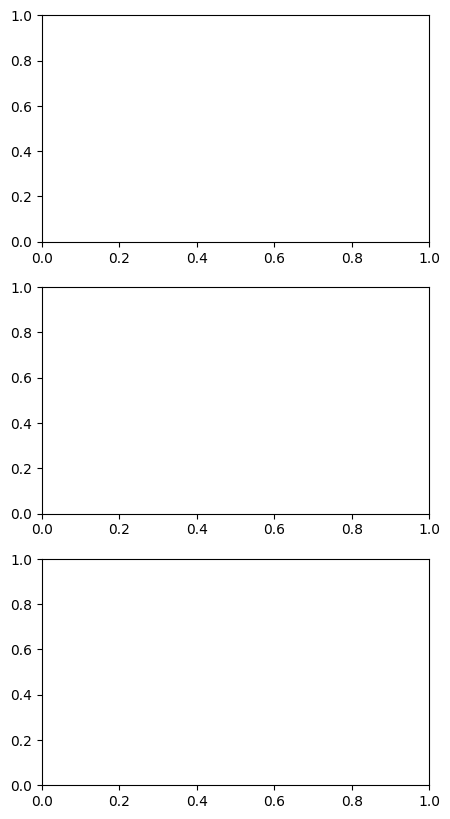

In [ ]:
ColsNom = ['emp_title',
           'emp_length',
           'state',
           'homeownership',
           'verified_income',
           'verification_income_joint',
           'loan_purpose',
           'application_type',
           'grade',
           'sub_grade',
           'issue_month',
           'loan_status',
           'initial_listing_status',
           'disbursement_method']

plt.figure(1)
plt.subplots(3, 1, figsize=(5, 10)); n=0
for Col in ColsNom:
    n+=1
    plt.subplot(3, 1, n)
    Df_orgTrans.groupby(Col).size().plot(kind='barh', xlim=(0,50000))